In [164]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [165]:
df = pd.read_csv('dataset.csv',low_memory=False)

In [166]:
df.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
64571,2020-04-21,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
84602,2020-04-19,1.0,0.0,0.0,0.0,0.0,negative,NaN,male,Abroad
23298,2020-04-27,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other
60835,2020-04-22,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other
253346,2020-03-24,1.0,0.0,0.0,0.0,0.0,negative,No,female,Abroad


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   test_date            278848 non-null  object 
 1   cough                278596 non-null  float64
 2   fever                278596 non-null  float64
 3   sore_throat          278847 non-null  float64
 4   shortness_of_breath  278847 non-null  float64
 5   head_ache            278847 non-null  float64
 6   corona_result        278848 non-null  object 
 7   age_60_and_above     151528 non-null  object 
 8   gender               259285 non-null  object 
 9   test_indication      278848 non-null  object 
dtypes: float64(5), object(5)
memory usage: 21.3+ MB


In [168]:
df['test_indication'].value_counts()

,count
test_indication,
Other,242741
Abroad,25468
Contact with confirmed,10639


In [169]:
df.isnull().mean() * 100

,0
test_date,0.000000
cough,0.090372
fever,0.090372
sore_throat,0.000359
shortness_of_breath,0.000359
head_ache,0.000359
corona_result,0.000000
age_60_and_above,45.659284
gender,7.015650
test_indication,0.000000


In [170]:
cols = ['sore_throat','shortness_of_breath', 'head_ache']
df = df.dropna(subset=cols)

In [171]:
df.shape

(278847, 10)

In [172]:
df.duplicated().sum()

np.int64(272207)

In [ ]:
# Working with test_date column
# Converting to datetime datatype
df['test_date'] = pd.to_datetime(df['test_date'])

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278847 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   test_date            278847 non-null  object 
 1   cough                278596 non-null  float64
 2   fever                278596 non-null  float64
 3   sore_throat          278847 non-null  float64
 4   shortness_of_breath  278847 non-null  float64
 5   head_ache            278847 non-null  float64
 6   corona_result        278847 non-null  object 
 7   age_60_and_above     151528 non-null  object 
 8   gender               259285 non-null  object 
 9   test_indication      278847 non-null  object 
dtypes: float64(5), object(5)
memory usage: 23.4+ MB


In [175]:
df['test_date'] = pd.to_datetime(df['test_date'], errors='coerce')

df['test_date_month'] = df['test_date'].dt.month_name()
df.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month
21124,2020-04-27,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April
122387,2020-04-15,1.0,1.0,0.0,0.0,0.0,negative,NaN,male,Abroad,April
173527,2020-04-06,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,April
162401,2020-04-08,1.0,0.0,0.0,0.0,0.0,negative,No,male,Other,April
189673,2020-04-03,NaN,NaN,0.0,0.0,0.0,negative,No,female,Other,April


In [176]:
df['test_date_day'] = df['test_date'].dt.day
df.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month,test_date_day
246248,2020-03-26,1.0,1.0,0.0,0.0,0.0,positive,No,male,Other,March,26
40793,2020-04-24,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,24
125115,2020-04-14,0.0,0.0,0.0,0.0,0.0,negative,No,female,Other,April,14
201722,2020-04-02,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,April,2
108463,2020-04-16,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,16


## Univariate Analysis

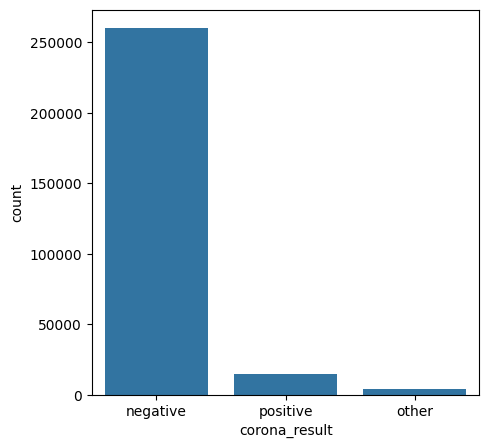

In [177]:
plt.figure(figsize=(5,5))
sns.countplot(x='corona_result',data=df)
plt.show()

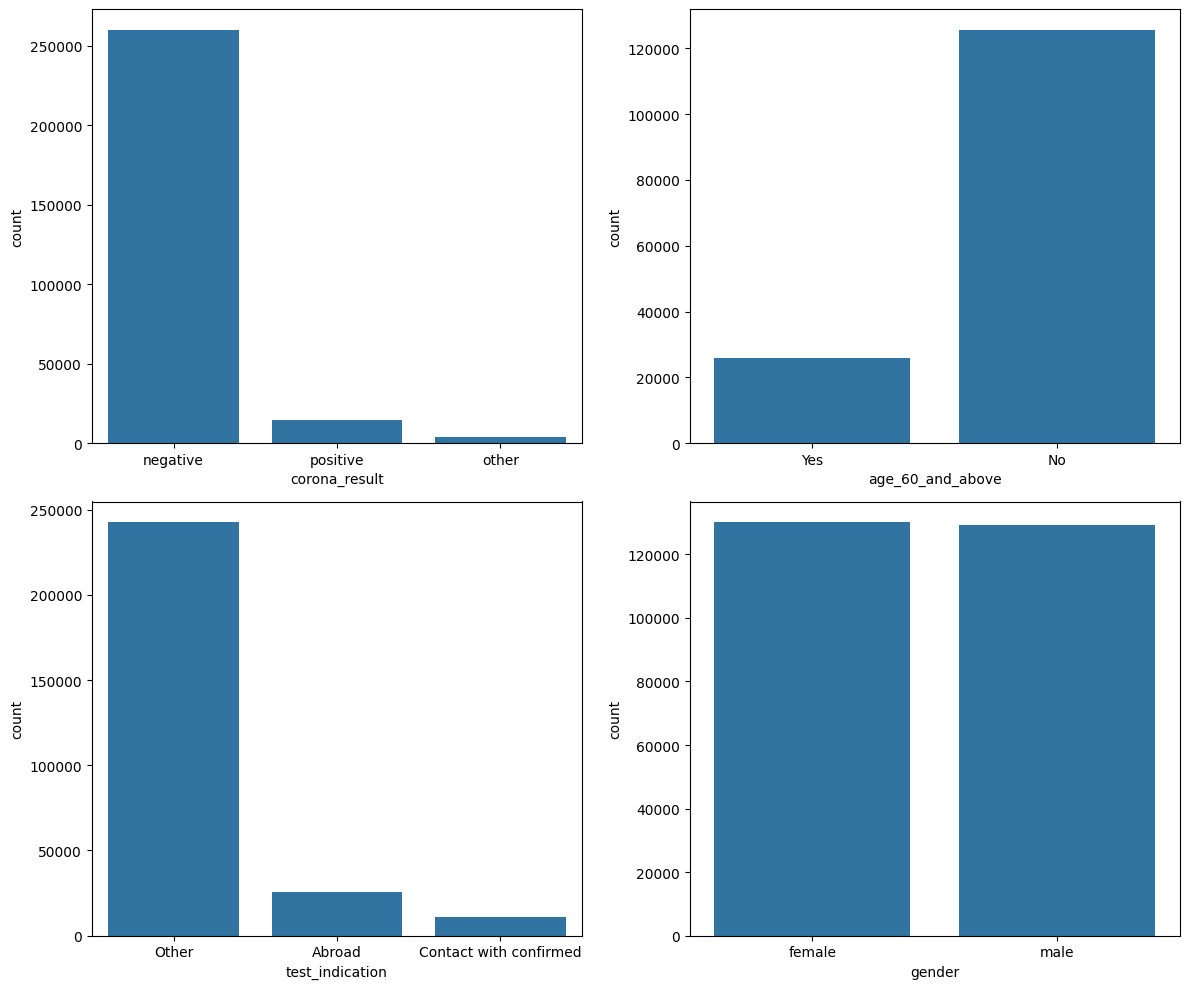

In [178]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot for Column1
plt.subplot(2, 2, 1)
sns.countplot(x='corona_result', data=df)

# Plot for Column2
plt.subplot(2, 2, 2)
sns.countplot(x='age_60_and_above', data=df)

# Plot for Column3
plt.subplot(2, 2, 3)
sns.countplot(x='test_indication', data=df)

# Plot for Column4
plt.subplot(2, 2, 4)
sns.countplot(x='gender', data=df)

# Show plot
plt.tight_layout()
plt.show()

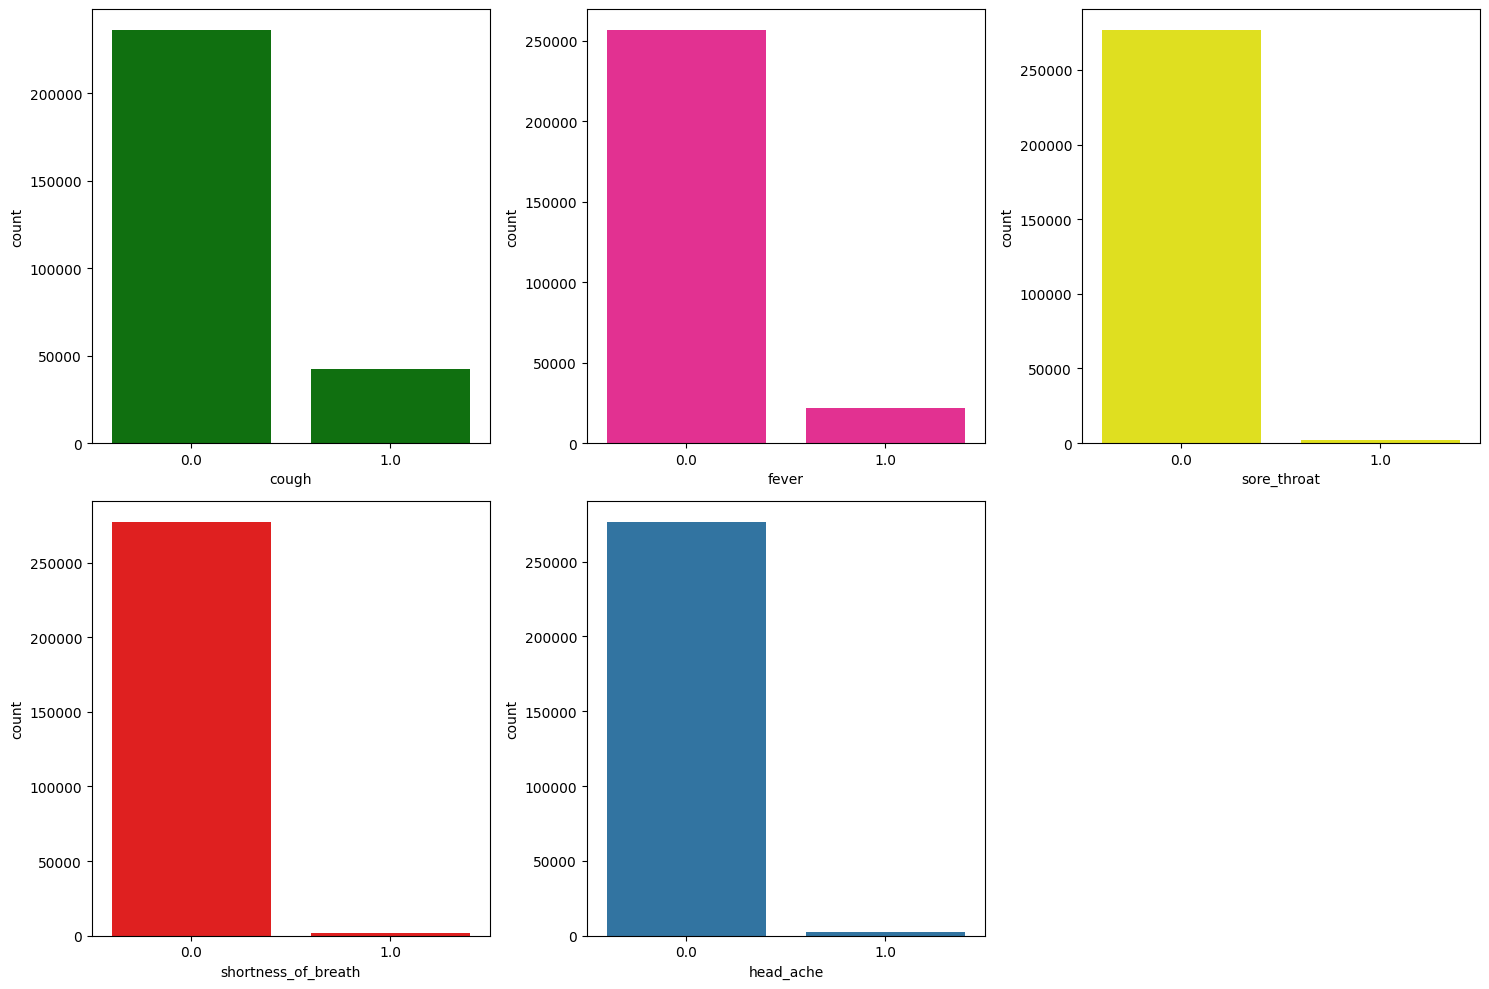

In [179]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot for Column1
plt.subplot(2, 3, 1)
sns.countplot(x='cough', data=df, color='green')

# Plot for Column2
plt.subplot(2, 3, 2)
sns.countplot(x='fever', data=df, color='deeppink')

# Plot for Column3
plt.subplot(2, 3, 3)
sns.countplot(x='sore_throat', data=df, color='yellow')

# Plot for Column4
plt.subplot(2, 3, 4)
sns.countplot(x='shortness_of_breath', data=df, color='red')

# Plot for Column5
plt.subplot(2, 3, 5)
sns.countplot(x='head_ache', data=df)

# Show plot
plt.tight_layout()
plt.show()

## Bivariate Analysis

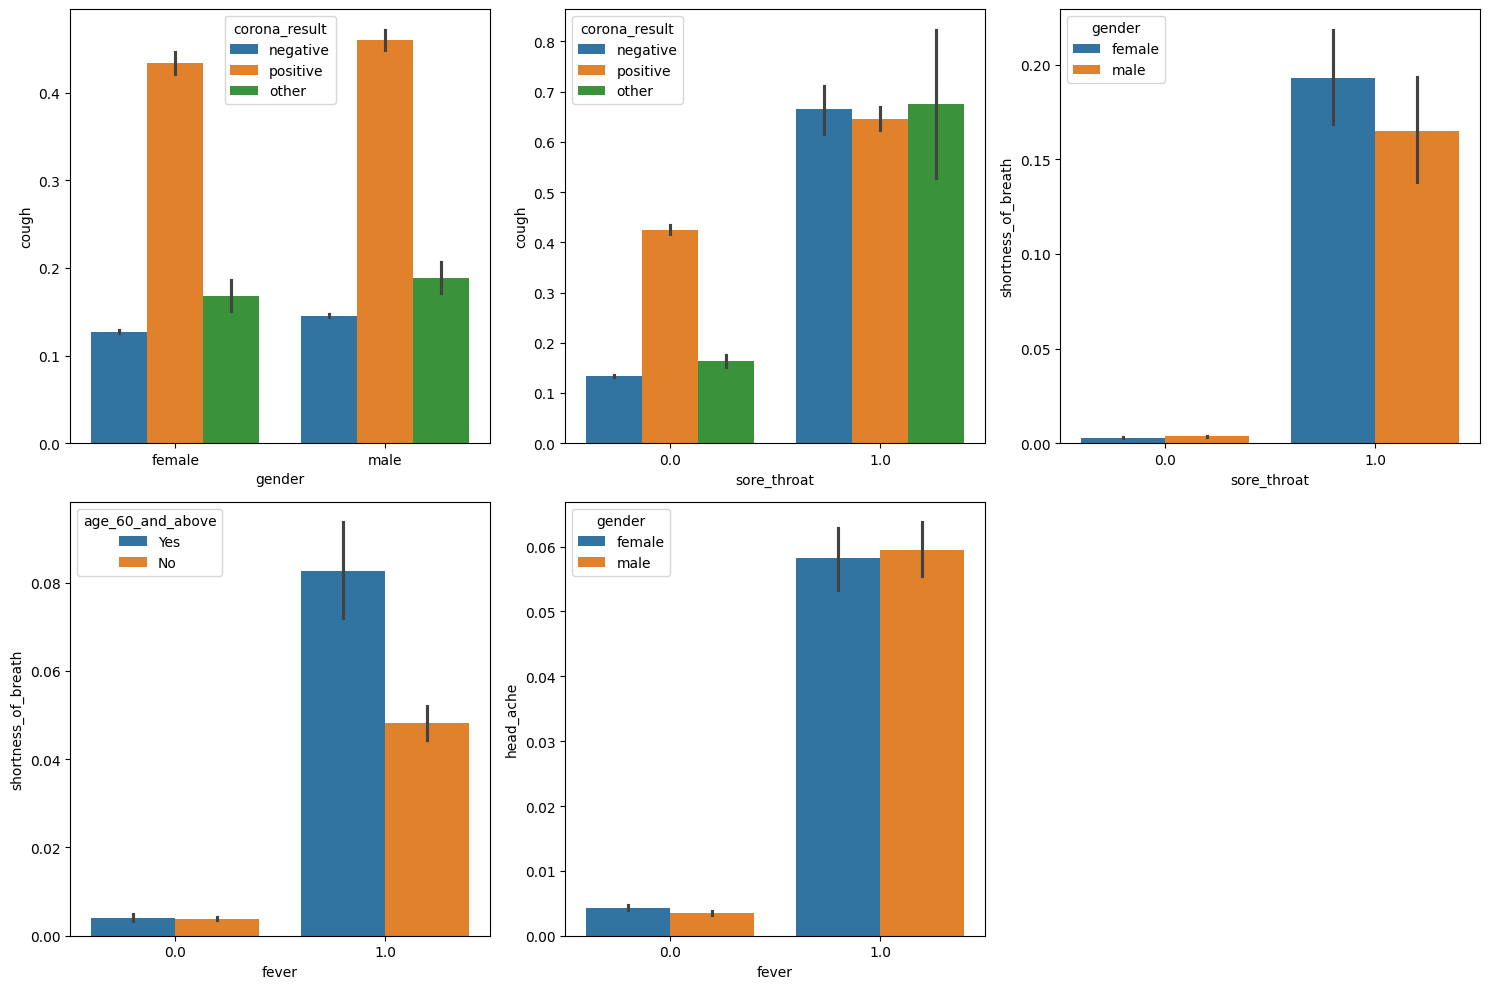

In [180]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot for Column1
plt.subplot(2, 3, 1)
sns.barplot(data=df, x='gender', y='cough' ,hue=df['corona_result'])

# Plot for Column2
plt.subplot(2, 3, 2)
sns.barplot(data=df, x='sore_throat', y='cough' ,hue=df['corona_result'])

# Plot for Column3
plt.subplot(2, 3, 3)
sns.barplot(data=df ,x='sore_throat', y='shortness_of_breath', hue=df['gender'])

# Plot for Column4
plt.subplot(2, 3, 4)
sns.barplot(data=df ,x='fever', y='shortness_of_breath', hue=df['age_60_and_above'])

# Plot for Column5
plt.subplot(2, 3, 5)
sns.barplot(data=df ,x='fever', y='head_ache', hue=df['gender'])

# Show plot
plt.tight_layout()
plt.show()

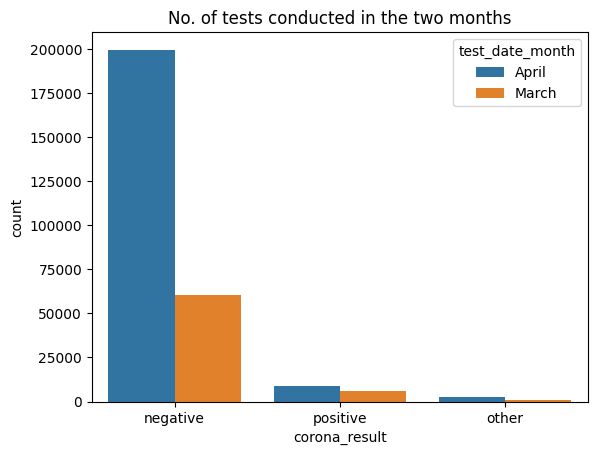

In [181]:
plt.title("No. of tests conducted in the two months")
sns.countplot(data=df, x='corona_result', hue='test_date_month')
plt.show()

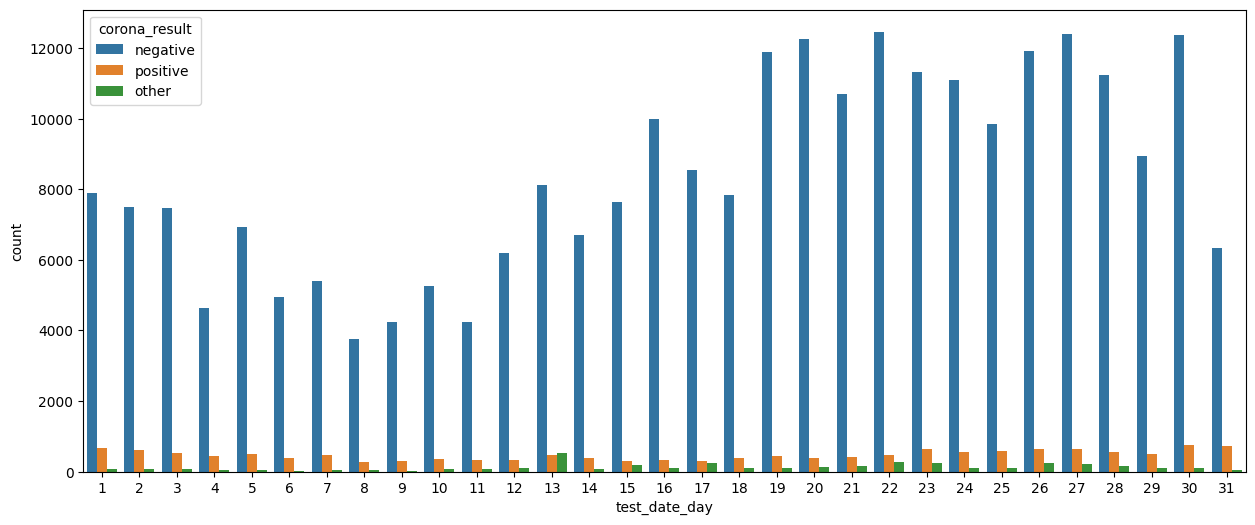

In [182]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='test_date_day', hue='corona_result')
plt.show()

In [183]:
df['test_date'] = pd.to_datetime(df['test_date'])
df['test_date_month'] = df['test_date'].dt.month_name()
df['test_date_day'] = df['test_date'].dt.day

## Train test split

In [184]:
from sklearn.model_selection import train_test_split

X = df
y = df['corona_result']

In [185]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [186]:
X_train

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month,test_date_day
95011,2020-04-18,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,18
149262,2020-04-10,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,April,10
170331,2020-04-06,1.0,0.0,0.0,0.0,0.0,negative,No,male,Abroad,April,6
21499,2020-04-27,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other,April,27
234875,2020-03-28,0.0,0.0,0.0,0.0,0.0,negative,No,female,Other,March,28
...,...,...,...,...,...,...,...,...,...,...,...,...
33867,2020-04-25,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,25
84434,2020-04-19,1.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,19
95816,2020-04-18,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,18
203245,2020-04-01,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,April,1


## Handling Missing data

In [187]:
X_train['age_60_and_above_imputed'] = X_train['age_60_and_above']
X_test['age_60_and_above_imputed'] = X_test['age_60_and_above']

X_train['gender_imputed'] = X_train['gender']
X_test['gender_imputed'] = X_test['gender']

In [188]:
X_train.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month,test_date_day,age_60_and_above_imputed,gender_imputed
93060,2020-04-18,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other,April,18,NaN,female
71871,2020-04-20,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,20,NaN,male
236283,2020-03-27,1.0,1.0,0.0,0.0,0.0,negative,No,male,Abroad,March,27,No,male
226964,2020-03-29,0.0,0.0,0.0,0.0,0.0,negative,Yes,female,Other,March,29,Yes,female
173008,2020-04-06,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,April,6,No,male


In [189]:
X_train['age_60_and_above_imputed'][X_train['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X_train['age_60_and_above'].isnull().sum(), replace=True).values
X_test['age_60_and_above_imputed'][X_test['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X_test['age_60_and_above'].isnull().sum(), replace=True).values

X_train['gender_imputed'][X_train['gender_imputed'].isnull()] = X_train['gender'].dropna().sample(X_train['gender'].isnull().sum(), replace=True).values
X_test['gender_imputed'][X_test['gender_imputed'].isnull()] = X_train['gender'].dropna().sample(X_test['gender'].isnull().sum(), replace=True).values


/tmp/ipython-input-4002590267.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['age_60_and_above_imputed'][X_train['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X_train['age_60_and_above'].isn

In [190]:
temp = pd.concat(
        [
            X_train['age_60_and_above'].value_counts() / len(X_train['age_60_and_above'].dropna()),
            X_train['age_60_and_above_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [14]:
temp

,original,imputed
No,0.828603,0.450322
Yes,0.171397,0.092900


In [191]:
temp = pd.concat(
        [
            X_train['gender'].value_counts() / len(X_train['gender'].dropna()),
            X_train['gender_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
female,0.502439,0.401801
male,0.497561,0.398197


In [192]:
X_train['cough_imputed'] = X_train['cough']
X_test['cough_imputed'] = X_test['cough']

X_train['cough_imputed'][X_train['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_train['cough'].isnull().sum()).values
X_test['cough_imputed'][X_test['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_test['cough'].isnull().sum()).values

/tmp/ipython-input-3394986770.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['cough_imputed'][X_train['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_train['cough'].isnull().sum()).values
/tmp/ipython-input-33949

In [193]:
X_train['fever_imputed'] = X_train['fever']
X_test['fever_imputed'] = X_test['fever']

X_train['fever_imputed'][X_train['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_train['fever'].isnull().sum()).values
X_test['fever_imputed'][X_test['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_test['fever'].isnull().sum()).values

/tmp/ipython-input-4294878389.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['fever_imputed'][X_train['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_train['fever'].isnull().sum()).values
/tmp/ipython-input-42948

In [194]:
X_train.drop(['cough', 'fever', 'age_60_and_above', 'gender'], axis=1, inplace=True)
X_test.drop(['cough', 'fever', 'age_60_and_above', 'gender'], axis=1, inplace=True)

In [195]:
X_train.rename(columns={'age_60_and_above_imputed': 'age_60_and_above', 'gender_imputed': 'gender', 'cough_imputed' : 'cough', 'fever_imputed' : 'fever'}, inplace=True)
X_test.rename(columns={'age_60_and_above_imputed': 'age_60_and_above', 'gender_imputed': 'gender', 'cough_imputed' : 'cough', 'fever_imputed' : 'fever'}, inplace=True)

In [196]:
X_train.drop('corona_result', axis=1, inplace=True)
X_test.drop('corona_result', axis=1, inplace=True)

In [197]:
X_train.isnull().mean() * 100

,0
test_date,0.0
sore_throat,0.0
shortness_of_breath,0.0
head_ache,0.0
test_indication,0.0
test_date_month,0.0
test_date_day,0.0
age_60_and_above,0.0
gender,0.0
cough,0.0


In [198]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse_output=False,drop='first'),['age_60_and_above','gender','test_indication','test_date_month'])
],remainder='passthrough')

## Encoding on categorical columns

In [199]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y_train)

LabelEncoder()

In [200]:
le.classes_

array(['negative', 'other', 'positive'], dtype=object)

In [201]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [202]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [203]:
# Fit and transform on the training data
X_train_encoded = transformer.fit_transform(X_train)

# Transform the test data
X_test_encoded = transformer.transform(X_test)

In [204]:
X_train = pd.DataFrame(X_train_encoded, columns=transformer.get_feature_names_out()).fillna(0)
X_test = pd.DataFrame(X_test_encoded, columns=transformer.get_feature_names_out()).fillna(0)

/tmp/ipython-input-4191264848.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train = pd.DataFrame(X_train_encoded, columns=transformer.get_feature_names_out()).fillna(0)
/tmp/ipython-input-4191264848.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test = pd.DataFrame(X_test_encoded, columns=transformer.get_feature_names_out()).fillna(0)


In [205]:
X_train.drop('remainder__test_date', axis=1, inplace=True)
X_test.drop('remainder__test_date', axis=1, inplace=True)

In [206]:
X_test.isnull().mean()*100

,0
tnf1__age_60_and_above_Yes,0.0
tnf1__gender_male,0.0
tnf1__test_indication_Contact with confirmed,0.0
tnf1__test_indication_Other,0.0
tnf1__test_date_month_March,0.0
remainder__sore_throat,0.0
remainder__shortness_of_breath,0.0
remainder__head_ache,0.0
remainder__test_date_day,0.0
remainder__cough,0.0


In [207]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.955944055944056

Confusion Matrix:
[[51565     4   455]
 [  768     1    39]
 [ 1186     5  1747]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     52024
           1       0.10      0.00      0.00       808
           2       0.78      0.59      0.67      2938

    accuracy                           0.96     55770
   macro avg       0.61      0.53      0.55     55770
weighted avg       0.94      0.96      0.95     55770



In [208]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize the ANN classifier
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Training the classifier on the training data
ann_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_ann = ann_classifier.predict(X_test)

# Calculating accuracy
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("Accuracy - ANN:", accuracy_ann)




Accuracy - ANN: 0.9568047337278106


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Training the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_dt = dt_classifier.predict(X_test)

# Calculating accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy - Decision Tree:", accuracy_dt)


Accuracy - Decision Tree: 0.9546171776941008


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Training the classifier on the training data
logistic_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_logistic = logistic_classifier.predict(X_test)

# Calculating accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy - Logistic Regression:", accuracy_logistic)


Accuracy - Logistic Regression: 0.9489331181638874


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [209]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = gb_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9562309485386409


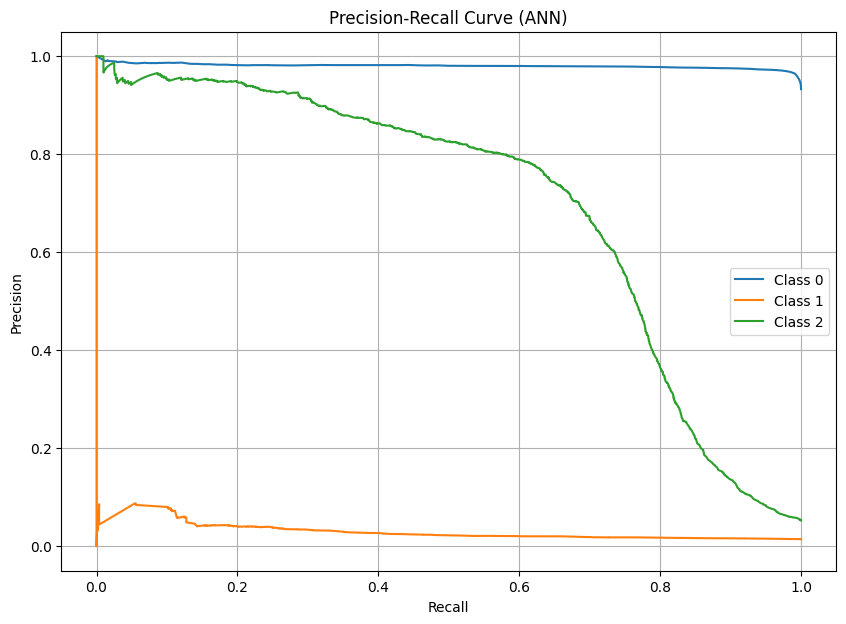

In [213]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Convert y_test to binary form using ANN classes
y_test_binary = label_binarize(y_test, classes=ann_classifier.classes_)

# Get probability predictions from ANN
y_pred_binary = ann_classifier.predict_proba(X_test)

# Compute precision-recall pairs for each class
precision = dict()
recall = dict()
thresholds = dict()

for i in range(len(ann_classifier.classes_)):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(
        y_test_binary[:, i],
        y_pred_binary[:, i]
    )

# Plot precision–recall curve for each class
plt.figure(figsize=(10, 7))

for i in range(len(ann_classifier.classes_)):
    plt.plot(recall[i], precision[i], label=f"Class {i}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (ANN)')
plt.legend()
plt.grid(True)
plt.show()

In [214]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculating accuracy
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("Accuracy - ANN:", accuracy_ann)

# Precision-Recall Curve (for binary classification only)
# precision_ann, recall_ann, _ = precision_recall_curve(y_test, y_pred_ann)

# Confusion Matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
print("\nConfusion Matrix - ANN:")
print(conf_matrix_ann)

# Classification Report
class_report_ann = classification_report(y_test, y_pred_ann)
print("\nClassification Report - ANN:")
print(class_report_ann)


Accuracy - ANN: 0.9568047337278106

Confusion Matrix - ANN:
[[51593     0   431]
 [  767     0    41]
 [ 1170     0  1768]]

Classification Report - ANN:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     52024
           1       0.00      0.00      0.00       808
           2       0.79      0.60      0.68      2938

    accuracy                           0.96     55770
   macro avg       0.58      0.53      0.55     55770
weighted avg       0.94      0.96      0.95     55770



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
